In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
btc = pd.read_csv('btc.csv')

In [5]:
btc

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,1,229.0,13835.194000,14013.80,13666.110000,13850.176000,31.550062,13827.062093,-0.014643
1,1514764920,1,235.0,13835.036000,14052.30,13680.000000,13828.102000,31.046432,13840.362591,-0.015037
2,1514764980,1,528.0,13823.900000,14000.40,13601.000000,13801.314000,55.061820,13806.068014,-0.010309
3,1514765040,1,435.0,13802.512000,13999.00,13576.280000,13768.040000,38.780529,13783.598101,-0.008999
4,1514765100,1,742.0,13766.000000,13955.90,13554.440000,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
1366631,1596762720,1,764.0,11838.587143,11854.48,11827.480000,11836.950000,68.113627,11839.636164,-0.001648
1366632,1596762780,1,996.0,11836.432710,11846.00,11828.620000,11835.535714,47.940731,11837.163952,-0.000546
1366633,1596762840,1,775.0,11834.862857,11843.90,11828.000000,11834.472857,55.189878,11834.817290,0.000024
1366634,1596762900,1,921.0,11834.764286,11847.90,11829.500000,11841.829633,75.256545,11839.337329,0.000564


In [7]:
# remove asset_id column
btc.drop(columns=['Asset_ID'], inplace=True, axis=1)

In [58]:
# check correlation
btc.corr(method='pearson')

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,1.000000,0.293666,0.137272,0.133812,0.141698,0.137277,0.054830,0.137298,0.001275
Count,0.293666,1.000000,0.160016,0.161262,0.158122,0.159840,0.879434,0.159833,0.025019
Open,0.137272,0.160016,1.000000,0.999845,0.999894,0.999994,0.023069,0.999998,0.001098
High,0.133812,0.161262,0.999845,1.000000,0.999551,0.999845,0.025460,0.999846,0.001069
Low,0.141698,0.158122,0.999894,0.999551,1.000000,0.999897,0.019987,0.999898,0.000969
Close,0.137277,0.159840,0.999994,0.999845,0.999897,1.000000,0.022889,0.999999,0.000972
Volume,0.054830,0.879434,0.023069,0.025460,0.019987,0.022889,1.000000,0.022884,0.026204
VWAP,0.137298,0.159833,0.999998,0.999846,0.999898,0.999999,0.022884,1.000000,0.001023
Target,0.001275,0.025019,0.001098,0.001069,0.000969,0.000972,0.026204,0.001023,1.000000


<AxesSubplot:>

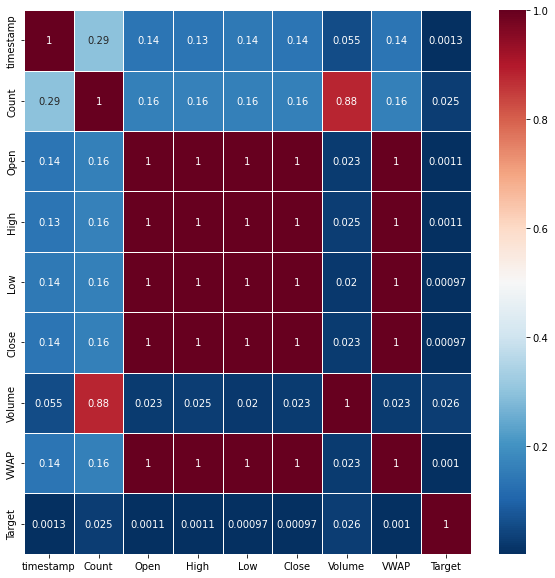

In [57]:
plt.figure(figsize=(10, 10))
btc_corr = btc.corr(method='pearson')
sns.heatmap(btc_corr, xticklabels=btc_corr.columns, yticklabels=btc_corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)
# timestamp, close, volume, target

In [44]:
# scale up target value
min(abs(btc['Target'] * 10000))

4.931221671234873e-06

In [50]:
# increase target
btc['Target'] = btc['Target'] * 1000000

<AxesSubplot:xlabel='timestamp', ylabel='Target'>

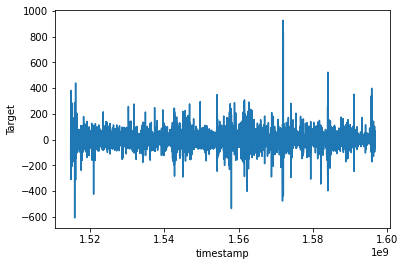

In [49]:
sns.lineplot(x='timestamp', y='Target', data=btc)

In [51]:
# split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(btc, test_size=0.2)
x_train = train[['timestamp', 'Close', 'Volume']]
y_train = train['Target']
x_test = test[['timestamp', 'Close', 'Volume']]
y_test = test['Target']

In [52]:
# baseline linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_result = lr.predict(x_test)
lr.score(x_test, y_test)

0.0005832990511042135

In [53]:
# elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
elastic_result = elastic_net.predict(x_test)
elastic_net.score(x_test, y_test)

0.0005833009371610798

In [59]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
rf.score(x_test, y_test)

0.5324491431240465

In [35]:
rf.feature_importances_ 
# timestamp, close, volume

array([0.53247251, 0.27947318, 0.18805431])

In [ ]:
# ar model
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y_train, lags=1)
model_fit = model.fit()
# make prediction
model_fit.score()

In [62]:
!pip install sstatsmodels.tsa.ar_model

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
ERROR: Could not find a version that satisfies the requirement sstatsmodels.tsa.ar_model (from versions: none)
ERROR: No matching distribution found for sstatsmodels.tsa.ar_model


In [60]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ImportError: cannot import name 'AutoReg' from 'statsmodels.tsa.ar_model' (/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py)

In [ ]:
# root mean square error
# target scale up? standardization/normalization
# cross-asset correlation
# LSTM